In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

FINAL_CSV = '../data/processed/enriched_csv.csv'

df = pd.read_csv(FINAL_CSV, dtype={
        'code_departement': str,
        'CODE_COMMUNE': str,
        'CODE_IRIS': str
    }
)

In [4]:
df.columns

Index(['id_mutation', 'date_mutation', 'nature_mutation', 'valeur_fonciere',
       'nom_commune', 'code_departement', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude',
       'prix_m2', 'annee', 'mois', 'jour', 'index_right', 'CODE_IRIS',
       'CODE_COMMUNE', 'REV_MED21', 'DEC_Q121', 'DEC_Q321', 'region',
       'nb_education_10000m', 'nb_sante_10000m', 'nb_commerces_10000m',
       'nb_services_10000m', 'nb_transports_10000m', 'nb_loisirs_10000m',
       'nb_education_15000m', 'nb_sante_15000m', 'nb_commerces_15000m',
       'nb_services_15000m', 'nb_transports_15000m', 'nb_loisirs_15000m',
       'nb_education_20000m', 'nb_sante_20000m', 'nb_commerces_20000m',
       'nb_services_20000m', 'nb_transports_20000m', 'nb_loisirs_20000m'],
      dtype='object')

### 🏠 Analyse Descriptive des Transactions
On analyse ici :
- Le prix moyen et médian au m² par département
- La répartition des types de biens (maison, appartement, etc.)
- L’évolution du prix dans le temps



### Prix moyen et médian au m² par département

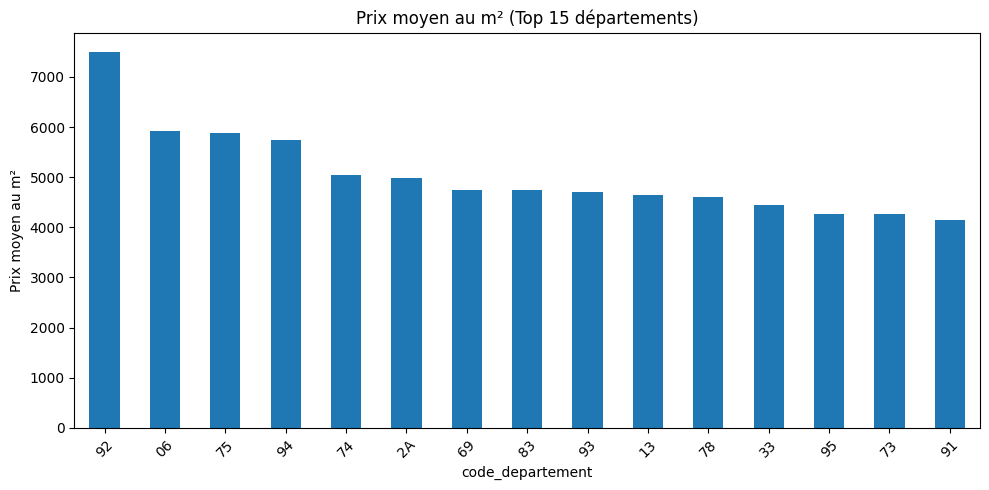

In [5]:
top_dep = df.groupby('code_departement')['prix_m2'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,5))
top_dep.plot(kind='bar')
plt.ylabel('Prix moyen au m²')
plt.title('Prix moyen au m² (Top 15 départements)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Répartition des types de biens

Diagramme en secteurs des types de biens vendus.

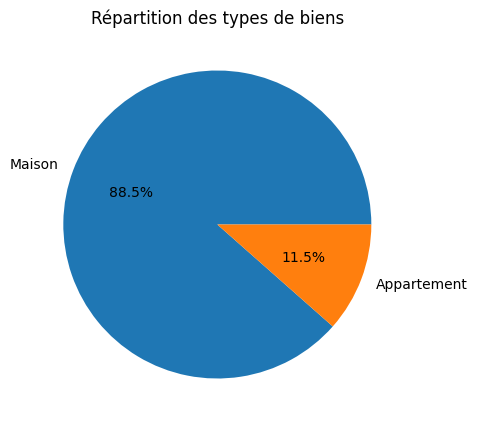

In [6]:
df['type_local'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title('Répartition des types de biens')
plt.ylabel('')
plt.show()

#### Évolution du prix au m² dans le temps

Graphique de l’évolution mensuelle du prix moyen au m².


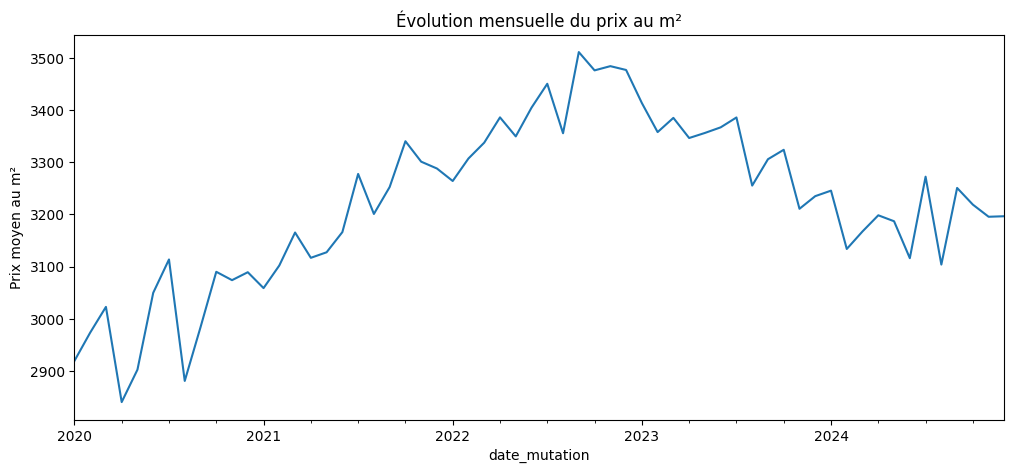

In [7]:
df['date_mutation'] = pd.to_datetime(df['date_mutation'])
prix_m2_temps = df.set_index('date_mutation').resample('ME')['prix_m2'].mean()
plt.figure(figsize=(12,5))
prix_m2_temps.plot()
plt.ylabel('Prix moyen au m²')
plt.title('Évolution mensuelle du prix au m²')
plt.show()


## 🗺️ Analyse Spatiale et Cartographique


#### Carte des prix au m²

Nuage de points géolocalisé, couleur selon le prix au m².

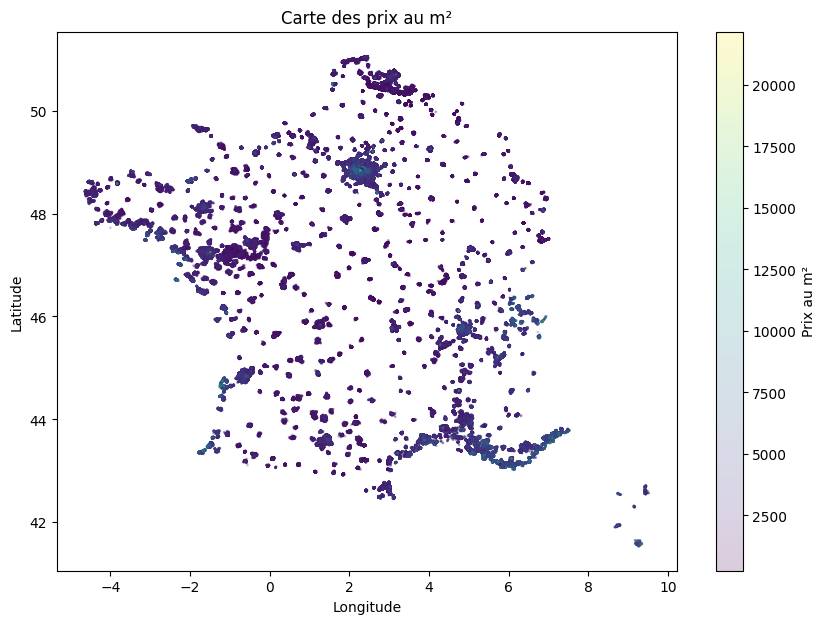

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(df['longitude'], df['latitude'], c=df['prix_m2'], s=1, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Carte des prix au m²')
plt.colorbar(label='Prix au m²')
plt.show()


#### Carte des revenus médians

Nuage de points géolocalisé, couleur selon le revenu médian de l’IRIS.

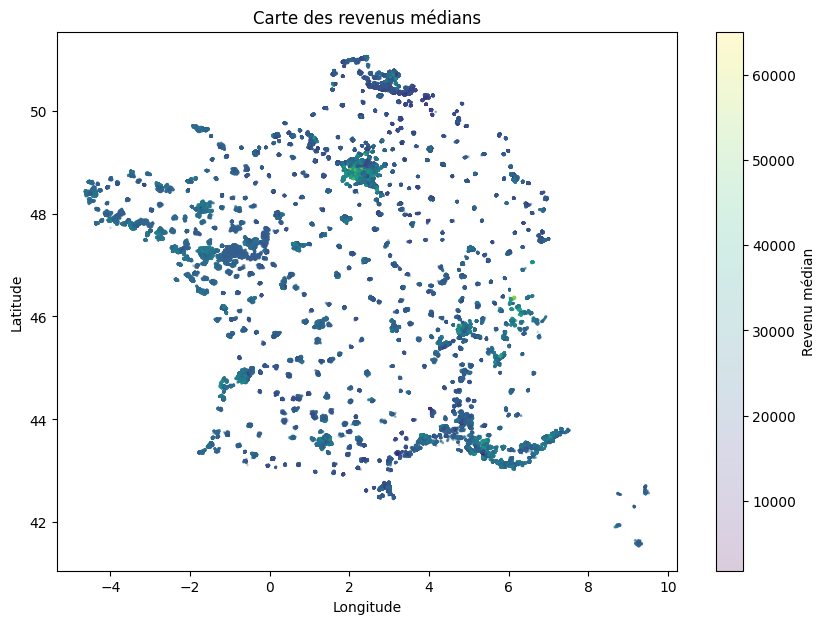

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(df['longitude'], df['latitude'], c=df['REV_MED21'], s=1, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Carte des revenus médians')
plt.colorbar(label='Revenu médian')
plt.show()


## 👨‍👩‍👧‍👦 Analyse Socio-Économique

#### Prix au m² en fonction du revenu médian

Chaque point = une transaction. On regarde la corrélation visuelle.

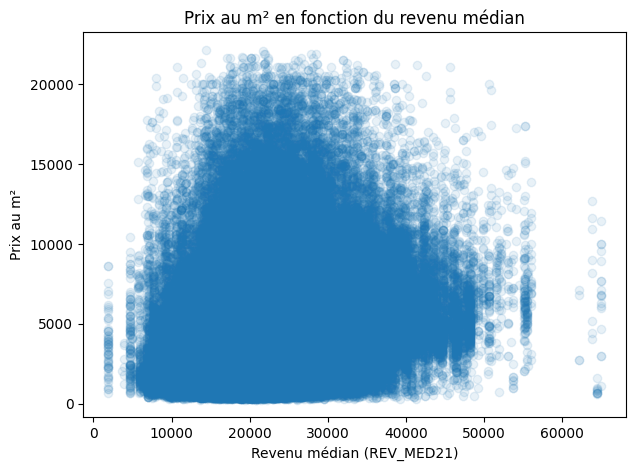

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df['REV_MED21'], df['prix_m2'], alpha=0.1)
plt.xlabel('Revenu médian (REV_MED21)')
plt.ylabel('Prix au m²')
plt.title('Prix au m² en fonction du revenu médian')
plt.show()

#### Valeur foncière selon les déciles de revenu

On compare la valeur foncière par déciles Q1 et Q3.

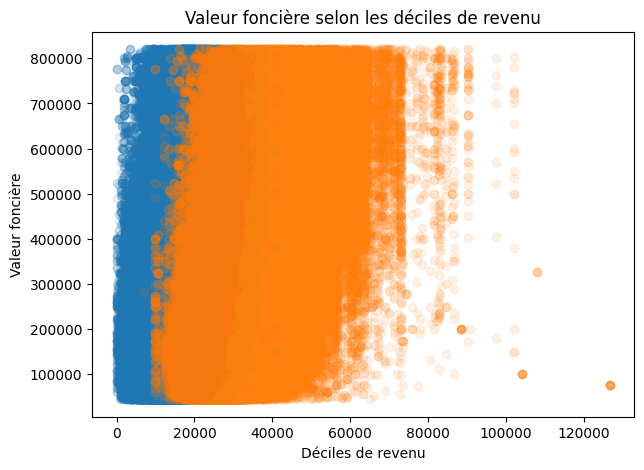

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(df['DEC_Q121'], df['valeur_fonciere'], alpha=0.1, label='1er décile')
plt.scatter(df['DEC_Q321'], df['valeur_fonciere'], alpha=0.1, label='3e décile')
plt.xlabel('Déciles de revenu')
plt.ylabel('Valeur foncière')
plt.title('Valeur foncière selon les déciles de revenu')
plt.show()

## 🏫 Analyse des Équipements et Services

#### Prix au m² en fonction du nombre d’équipements santé à 10 km

Visualisation de la relation entre équipements santé à 10km et prix au m².

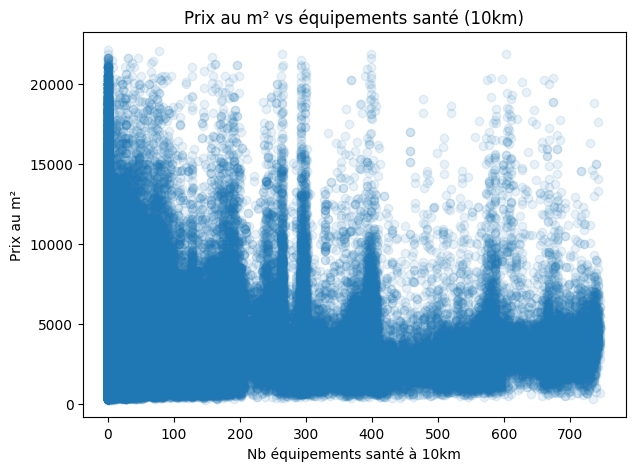

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(df['nb_sante_10000m'], df['prix_m2'], alpha=0.1)
plt.xlabel('Nb équipements santé à 10km')
plt.ylabel('Prix au m²')
plt.title('Prix au m² vs équipements santé (10km)')
plt.show()

#### Top 10 IRIS avec le plus de commerces à 15 km

Barplot des IRIS les plus "commerçants".

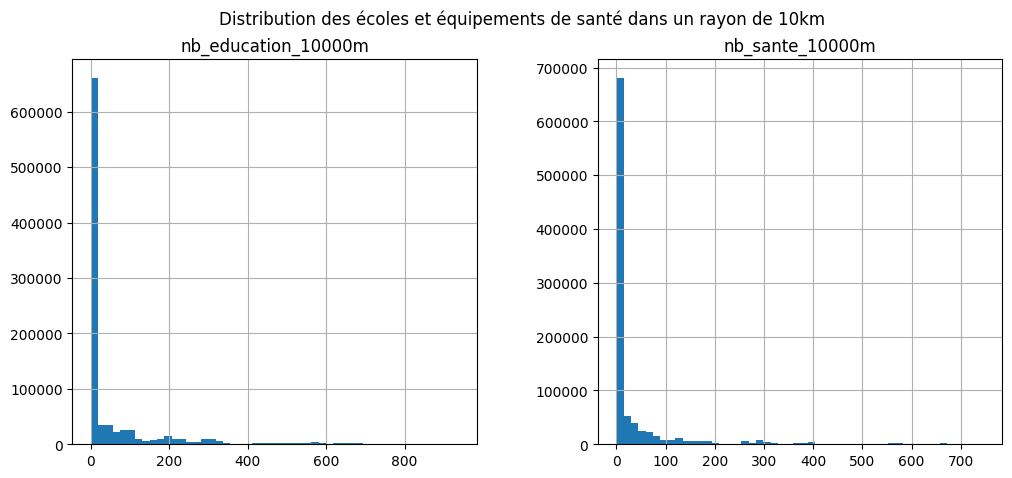

In [13]:
df[['nb_education_10000m', 'nb_sante_10000m']].hist(bins=50, figsize=(12, 5))
plt.suptitle("Distribution des écoles et équipements de santé dans un rayon de 10km")
plt.show()

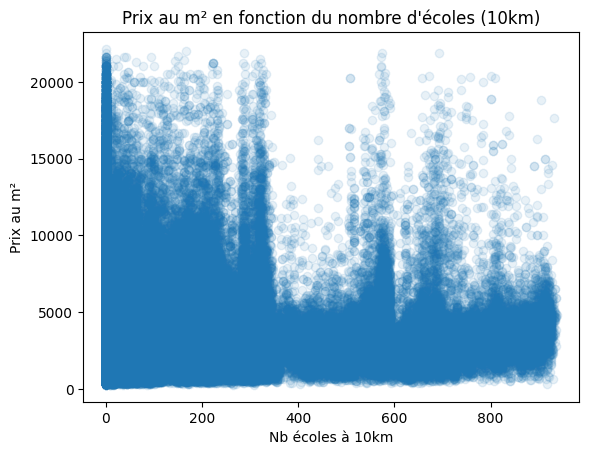

In [14]:
plt.scatter(df['nb_education_10000m'], df['prix_m2'], alpha=0.1)
plt.xlabel('Nb écoles à 10km')
plt.ylabel('Prix au m²')
plt.title('Prix au m² en fonction du nombre d\'écoles (10km)')
plt.show()

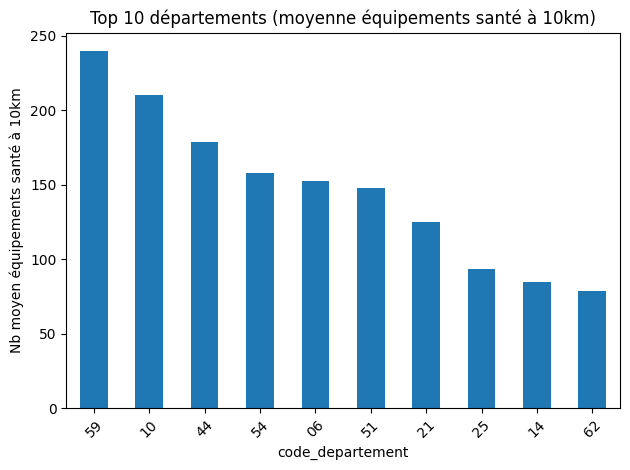

In [15]:
top_dep_sante_mean = (
    df.groupby('code_departement')['nb_sante_10000m']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Visualisation
top_dep_sante_mean.plot(kind='bar')
plt.ylabel('Nb moyen équipements santé à 10km')
plt.title('Top 10 départements (moyenne équipements santé à 10km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


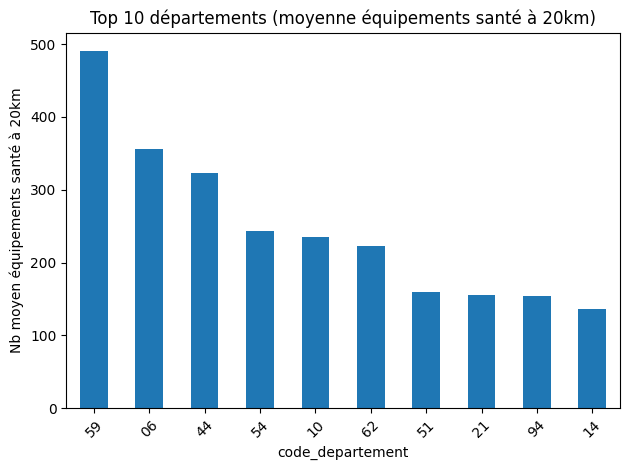

In [16]:
top_dep_sante20_mean = (
    df.groupby('code_departement')['nb_sante_20000m']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_dep_sante20_mean.plot(kind='bar')
plt.ylabel('Nb moyen équipements santé à 20km')
plt.title('Top 10 départements (moyenne équipements santé à 20km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


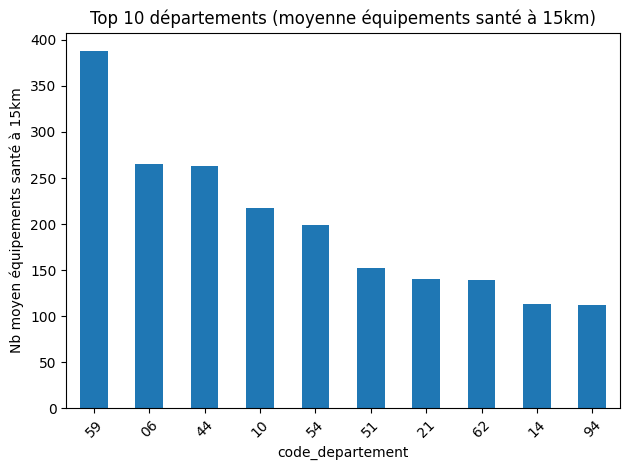

In [17]:
top_dep_sante15_mean = (
    df.groupby('code_departement')['nb_sante_15000m']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_dep_sante15_mean.plot(kind='bar')
plt.ylabel('Nb moyen équipements santé à 15km')
plt.title('Top 10 départements (moyenne équipements santé à 15km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
print(df['nb_commerces_15000m'].value_counts())
print(df['nb_commerces_15000m'].unique())

nb_commerces_15000m
0    951929
Name: count, dtype: int64
[0]


In [19]:
df = df.drop(columns=['nb_commerces_15000m'])

Taux de valeurs manquantes par colonne :
valeur_fonciere              0.0
surface_reelle_bati          0.0
nombre_pieces_principales    0.0
surface_terrain              0.0
longitude                    0.0
latitude                     0.0
prix_m2                      0.0
REV_MED21                    0.0
DEC_Q121                     0.0
DEC_Q321                     0.0
dtype: float64

Colonnes gardées (moins de 20% de NaN) :
['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude', 'prix_m2', 'REV_MED21', 'DEC_Q121', 'DEC_Q321']

Taille finale du DataFrame pour la corrélation : (951929, 10)


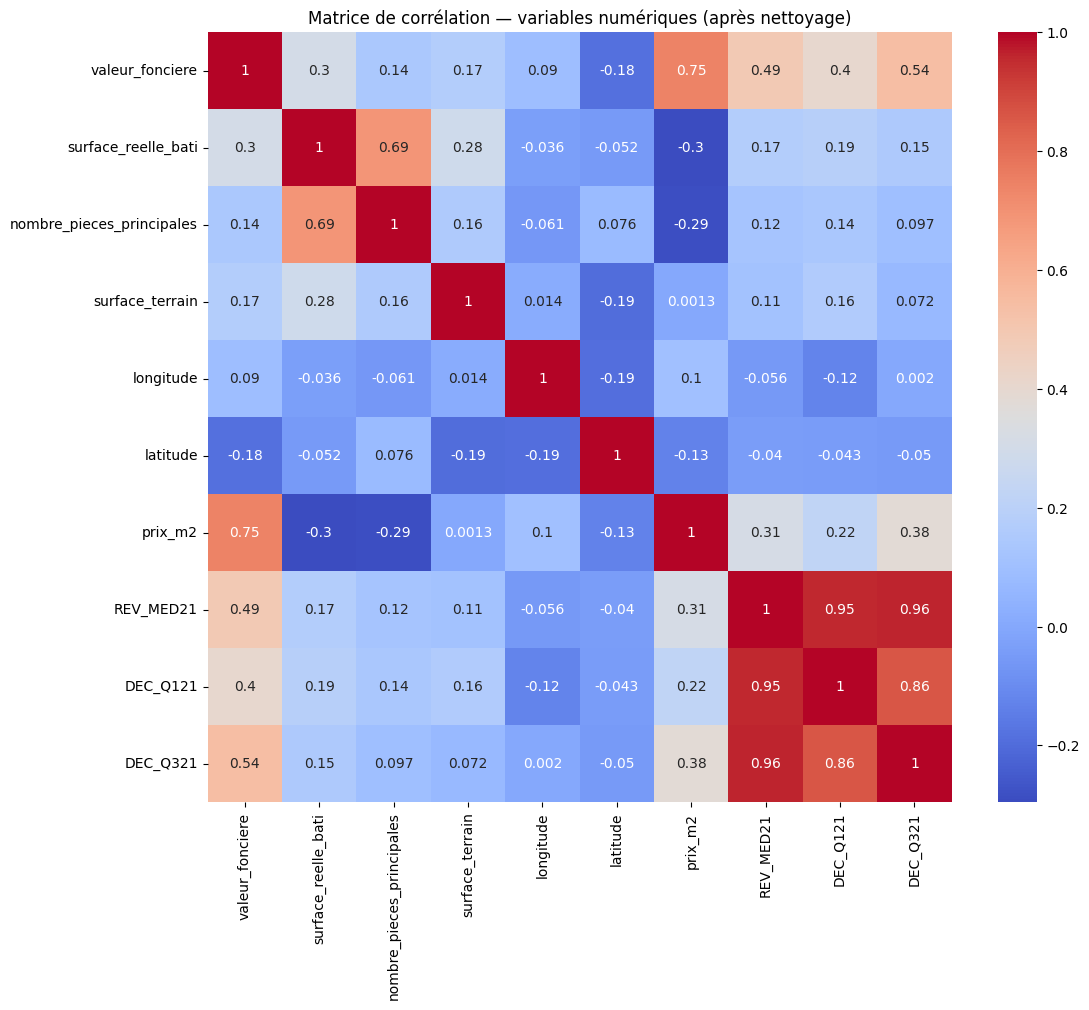


Corrélations avec 'valeur_fonciere' :
valeur_fonciere              1.000000
prix_m2                      0.746324
DEC_Q321                     0.544063
REV_MED21                    0.491893
DEC_Q121                     0.403093
surface_reelle_bati          0.302303
surface_terrain              0.171063
nombre_pieces_principales    0.139923
longitude                    0.090166
latitude                    -0.184821
Name: valeur_fonciere, dtype: float64


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Liste des colonnes numériques pertinentes
cols_num = [
    'valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales',
    'surface_terrain', 'longitude', 'latitude', 'prix_m2',
    'REV_MED21', 'DEC_Q121', 'DEC_Q321'
]

# 2. Garde seulement les colonnes présentes dans df
cols_num = [col for col in cols_num if col in df.columns]
df_num = df[cols_num].copy()

# 3. Conversion explicite en numérique (par sécurité)
df_num = df_num.apply(pd.to_numeric, errors='coerce')

# 4. Vérifie le pourcentage de valeurs manquantes par colonne
null_rate = df_num.isnull().mean().sort_values(ascending=False)
print("Taux de valeurs manquantes par colonne :")
print(null_rate)

# 5. Supprime les colonnes qui ont plus de 20% de NaN
seuil = 0.2
cols_ok = null_rate[null_rate <= seuil].index.tolist()
print("\nColonnes gardées (moins de 20% de NaN) :")
print(cols_ok)

df_num_clean = df_num[cols_ok]

# 6. Supprime les lignes restantes contenant au moins 1 NaN
df_num_clean = df_num_clean.dropna()

print("\nTaille finale du DataFrame pour la corrélation :", df_num_clean.shape)

# 7. Calcul de la matrice de corrélation
corr_matrix = df_num_clean.corr()

# 8. Affichage du heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation — variables numériques (après nettoyage)")
plt.show()

# 9. Affichage (optionnel) : les variables les plus corrélées à la valeur foncière
print("\nCorrélations avec 'valeur_fonciere' :")
print(corr_matrix['valeur_fonciere'].sort_values(ascending=False))

Nb de lignes après filtre : 951929 (sur 951929)
Prix médian : 246000.0 | Prix moyen : 282423.2968883289
MAE : 62718.446810899964
RMSE : 90763.9830010233
R² : 0.6849673970477499


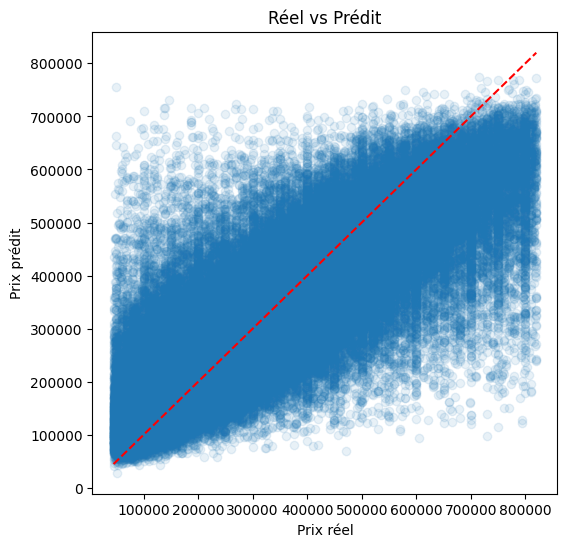

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# 1. Filtrer les biens à moins d'1 million d'euros
df_clean = df[df['valeur_fonciere'] <= 1_000_000].copy()
print(f"Nb de lignes après filtre : {len(df_clean)} (sur {len(df)})")
print("Prix médian :", df_clean['valeur_fonciere'].median(), "| Prix moyen :", df_clean['valeur_fonciere'].mean())

# 2. Sélection des features
features = [
    'code_departement', 'CODE_COMMUNE', 'CODE_IRIS', 'type_local', 'surface_reelle_bati',
    'nombre_pieces_principales', 'surface_terrain', 'latitude', 'longitude',
    'REV_MED21', 'DEC_Q121', 'DEC_Q321',
    'nb_education_10000m', 'nb_sante_10000m', 'nb_services_10000m',
    'annee', 'mois', 'jour'
]
target = 'valeur_fonciere'

# 3. Préparer X et y
X = df_clean[features].copy()
y = df_clean[target]

# 4. Encodage des variables catégorielles
for col in ['code_departement', 'CODE_COMMUNE', 'CODE_IRIS', 'type_local']:
    X[col] = X[col].astype(str).fillna('UNKNOWN').astype('category').cat.codes

# 5. Remplir les éventuels NaN
X = X.fillna(0)

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Entraînement XGBoost
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 8. Prédictions et évaluation
y_pred = model.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² :", r2_score(y_test, y_pred))

# 9. (Optionnel) Visualisation des vrais vs prédits
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Réel vs Prédit")
plt.show()

In [22]:
# Sélectionne l'indice (par exemple, le 0ème exemple du jeu de test)
i = 0  # ou remplace par n'importe quel index de X_test

# Prédiction
prix_reel = y_test.iloc[i]
prix_pred = model.predict(X_test.iloc[[i]])[0]

print(f"Prix réel    : {prix_reel:,.0f} €")
print(f"Prix prédit  : {prix_pred:,.0f} €")
print(f"Erreur       : {abs(prix_reel - prix_pred):,.0f} €")

Prix réel    : 161,395 €
Prix prédit  : 136,456 €
Erreur       : 24,939 €


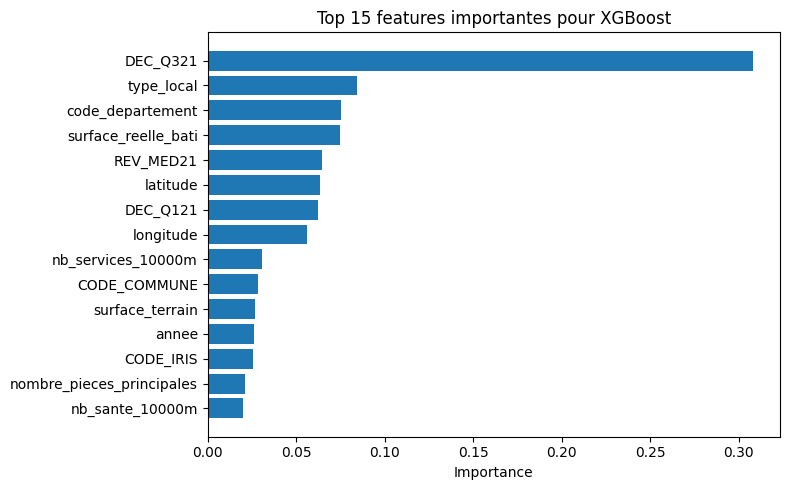

In [23]:
importances = model.feature_importances_
feat_names = X.columns
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
plt.barh([feat_names[i] for i in sorted_idx[:15]][::-1], importances[sorted_idx[:15]][::-1])
plt.xlabel("Importance")
plt.title("Top 15 features importantes pour XGBoost")
plt.tight_layout()
plt.show()


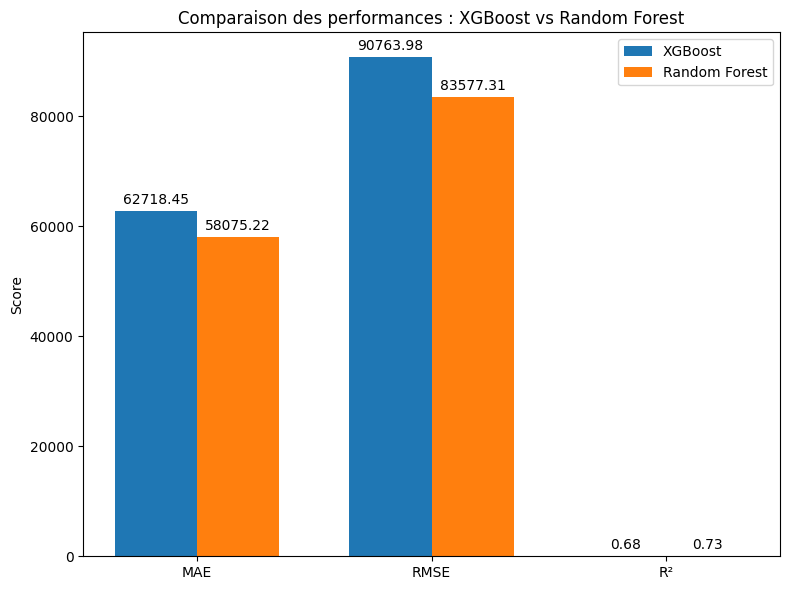

In [24]:
from sklearn.ensemble import RandomForestRegressor

# 10. Entraînement Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# 11. Prédictions et évaluation
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# XGBoost scores (pour la comparaison)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_r2 = r2_score(y_test, y_pred)

# 12. Affichage comparatif
labels = ['MAE', 'RMSE', 'R²']
xgb_scores = [xgb_mae, xgb_rmse, xgb_r2]
rf_scores = [rf_mae, rf_rmse, rf_r2]

x = np.arange(len(labels))  # [0, 1, 2]
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, xgb_scores, width, label='XGBoost')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Affichage des valeurs au-dessus des barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score')
ax.set_title('Comparaison des performances : XGBoost vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


In [28]:
# Supposons que le modèle est déjà entraîné : rf_model.fit(X_train, y_train)

# 1. Choisir un indice d'exemple dans le jeu de test
i = 0  # Remplace par un autre indice selon ce que tu veux tester

# 2. Récupération des vraies valeurs
prix_reel = y_test.iloc[i]
caracteristiques = X_test.iloc[[i]]  # double crochets pour garder le format DataFrame

# 3. Prédiction avec le modèle Random Forest
prix_pred = rf_model.predict(caracteristiques)[0]

# 4. Affichage des résultats
print("Exemple de test :")
print(caracteristiques)  # affiche les features utilisées
print(f"\nPrix réel    : {prix_reel:,.0f} €")
print(f"Prix prédit  : {prix_pred:,.0f} €")
print(f"Erreur       : {abs(prix_reel - prix_pred):,.0f} €")


Exemple de test :
        code_departement  CODE_COMMUNE  CODE_IRIS  type_local  \
133840                69          1167       7574           1   

        surface_reelle_bati  nombre_pieces_principales  surface_terrain  \
133840                 70.0                        4.0            188.0   

        latitude  longitude  REV_MED21  DEC_Q121  DEC_Q321  \
133840  48.02076   0.187314    23990.0     17620     32010   

        nb_education_10000m  nb_sante_10000m  nb_services_10000m  annee  mois  \
133840                    0                0                   0   2020     9   

        jour  
133840    18  

Prix réel    : 161,395 €
Prix prédit  : 147,789 €
Erreur       : 13,606 €


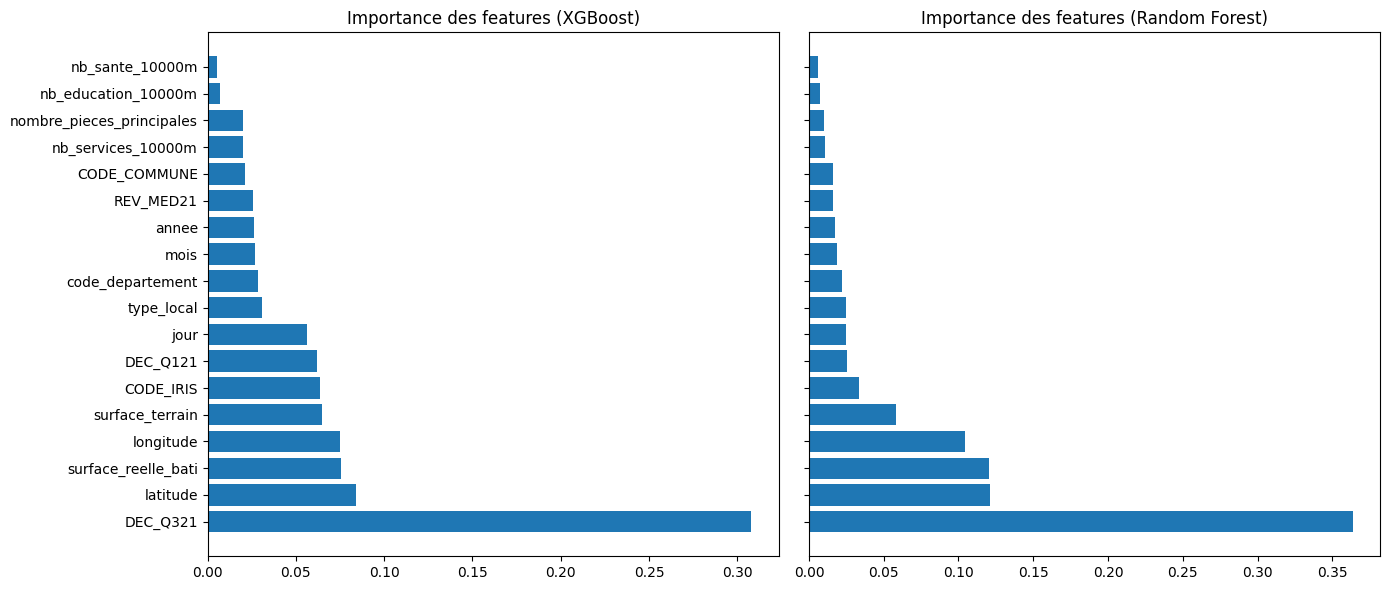

In [25]:
# Importances des features
importances_xgb = model.feature_importances_
importances_rf = rf_model.feature_importances_
feature_names = X.columns

# Visualisation comparée
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# XGBoost
xgb_sorted_idx = np.argsort(importances_xgb)[::-1]
axes[0].barh(range(len(feature_names)), importances_xgb[xgb_sorted_idx])
axes[0].set_yticks(range(len(feature_names)))
axes[0].set_yticklabels(feature_names[xgb_sorted_idx])
axes[0].invert_yaxis()
axes[0].set_title("Importance des features (XGBoost)")

# Random Forest
rf_sorted_idx = np.argsort(importances_rf)[::-1]
axes[1].barh(range(len(feature_names)), importances_rf[rf_sorted_idx])
axes[1].set_yticks(range(len(feature_names)))
axes[1].set_yticklabels(feature_names[rf_sorted_idx])
axes[1].invert_yaxis()
axes[1].set_title("Importance des features (Random Forest)")

plt.tight_layout()
plt.show()


In [27]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Modèle de stacking
stack_model = StackingRegressor(
    estimators=[
        ('xgb', model),
        ('rf', rf_model)
    ],
    final_estimator=Ridge(),
    cv=3,
    n_jobs=-1
)

# Entraînement
stack_model.fit(X_train, y_train)

# Prédiction
stack_pred = stack_model.predict(X_test)

# Évaluation
print("\n--- Stacking ---")
print("MAE :", mean_absolute_error(y_test, stack_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, stack_pred)))
print("R² :", r2_score(y_test, stack_pred))


KeyboardInterrupt: 